# PROJET 6 Analysez les ventes d'une librairie avec R ou Python

In [1]:
#Importation des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
import warnings
warnings.simplefilter("ignore")

In [2]:
#Importation des fichiers sources
df_customers= pd.read_csv(r"C:\Users\franc\Desktop\DATA\PROJET 6 Analysez les ventes d'une librairie avec R ou Python\customers.csv")
df_products=pd.read_csv(r"C:\Users\franc\Desktop\DATA\PROJET 6 Analysez les ventes d'une librairie avec R ou Python\products.csv")
df_transactions=pd.read_csv(r"C:\Users\franc\Desktop\DATA\PROJET 6 Analysez les ventes d'une librairie avec R ou Python\transactions.csv")

In [3]:
#Display des dataframes
print('df_customers')
display(df_customers.head())
display(df_customers.shape)
print('df_products')
display(df_products.head())
display(df_products.shape)
print('df_transactions')
display(df_transactions.head())
display(df_transactions.shape)

df_customers


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


(8623, 3)

df_products


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


(3287, 3)

df_transactions


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


(679532, 4)

# Nettoyage des données

## df_customers

In [4]:
#Affichage du df_customers
print('df_customers')
display(df_customers.head())
display(df_customers.shape)
display(df_customers.info())

df_customers


,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


(8623, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8623 entries, 0 to 8622
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   client_id  8623 non-null   object
 1   sex        8623 non-null   object
 2   birth      8623 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 202.2+ KB


None

In [5]:
#Vérification si on a des erreurs dans le genre
df_customers['sex'].unique()

array(['f', 'm'], dtype=object)

In [6]:
#Nombre de clients uniques dans la database
df_customers['client_id'].nunique()

8623

In [7]:
#Recherche de valeurs manquantes
df_customers_missing_values_count =df_customers.isnull().sum()
df_customers_missing_values_count.head()

client_id    0
sex          0
birth        0
dtype: int64

In [8]:
#On regarde la variable âge : min max pour vérifier qu'on a pas de valeurs abhérrantes
display(df_customers.describe())
print("Il ne semble pas y avoir d'erreurs au niveau des années")

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


Il ne semble pas y avoir d'erreurs au niveau des années


In [9]:
#Recherche de duplicat dans colonne product_id clé primaire candidate
dub_df_customers=df_customers.pivot_table(index=['client_id'], aggfunc='size')
dub_df_customers

client_id
c_1       1
c_10      1
c_100     1
c_1000    1
c_1001    1
         ..
c_997     1
c_998     1
c_999     1
ct_0      1
ct_1      1
Length: 8623, dtype: int64

In [10]:
#Recherche de duplicat
df_customers[df_customers.duplicated(['client_id'], keep= False)].sort_values(by=['client_id'])


,client_id,sex,birth


In [11]:
df_customers.duplicated(['client_id']).sum()

0

## df_products

In [12]:
#Affichage du dataframe df_product
print('df_products')
display(df_products.head())
display(df_products.shape)
display(df_products.info())

df_products


,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


(3287, 3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3287 entries, 0 to 3286
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id_prod  3287 non-null   object 
 1   price    3287 non-null   float64
 2   categ    3287 non-null   int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 77.2+ KB


None

In [13]:
#Changement du type de variable en object car id pour categ
df_products['categ']=df_products['categ'].astype('object')
display(df_products.dtypes)

id_prod     object
price      float64
categ       object
dtype: object

In [14]:
#Vérification pour voir si on a des valeurs abhérrantes sur les prix
df_products.describe()

,price
count,3287.000000
mean,21.856641
std,29.847908
min,-1.000000
25%,6.990000
50%,13.060000
75%,22.990000
max,300.000000


In [15]:
#Recherche des valeurs négatives pour les prix
df_products.loc[df_products['price']<0]
#erreur ou réduction? à investiguer

,id_prod,price,categ
731,T_0,-1.0,0


In [16]:
#On enlève le produit T_0 qui est négatif en gardant les valeurs positives
df_products=df_products[df_products.price>0]

In [17]:
df_products_missing_values_count=df_products.isnull().sum()
df_products_missing_values_count.head()

id_prod    0
price      0
categ      0
dtype: int64

In [18]:
#Recherche de duplicat
dub_products=df_products.pivot_table(index='id_prod', aggfunc='size')
dub_products

id_prod
0_0       1
0_1       1
0_10      1
0_100     1
0_1000    1
         ..
2_95      1
2_96      1
2_97      1
2_98      1
2_99      1
Length: 3286, dtype: int64

In [19]:
df_products[df_products.duplicated(['id_prod'], keep= False)].sort_values(by=['id_prod'])

,id_prod,price,categ


In [20]:
df_products.duplicated(['id_prod']).sum()

0

In [21]:
#df_products clean
display(df_products.head())
display(df_products.shape)

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


(3286, 3)

# df_transactions

In [22]:
#Affichage du df et de ses charactéristiques
print('df_transactions')
display(df_transactions.head())
display(df_transactions.shape)
display(df_transactions.info())

df_transactions


,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


(679532, 4)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679532 entries, 0 to 679531
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   id_prod     679532 non-null  object
 1   date        679532 non-null  object
 2   session_id  679532 non-null  object
 3   client_id   679532 non-null  object
dtypes: object(4)
memory usage: 20.7+ MB


None

In [23]:
#Recherche de valeurs nulles 
df_transactions_missing_values_count=df_transactions.isnull().sum()
print(df_transactions_missing_values_count)

id_prod       0
date          0
session_id    0
client_id     0
dtype: int64


In [24]:
#Recherche de duplicat
sub_df_transactions=df_transactions.pivot_table(index='session_id', aggfunc='size')
sub_df_transactions.head()

session_id
s_0       200
s_1         1
s_10        1
s_100       2
s_1000      4
dtype: int64

In [25]:
df_transactions.duplicated(['session_id','client_id', 'id_prod']).sum()

1025

In [26]:
df1 = df_transactions.loc[df_transactions[['id_prod','session_id','client_id']].duplicated(keep=False),:]
df1

,id_prod,date,session_id,client_id
582,0_1123,2021-04-29 21:21:22.708928,s_27641,c_4459
889,0_1335,2023-02-01 18:55:40.983876,s_335537,c_4561
1193,0_1424,2021-03-20 05:24:33.132965,s_8842,c_4595
1278,1_397,2022-05-17 05:45:19.203870,s_209799,c_915
1292,0_1361,2022-04-24 20:56:36.206670,s_198937,c_1784
...,...,...,...,...
677618,0_1561,2021-06-21 05:30:53.999603,s_51611,c_8596
678160,0_2267,2021-04-01 04:30:02.545268,s_14298,c_7526
679180,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_1
679356,1_459,2021-12-14 10:10:02.741338,s_134184,c_120


In [27]:
#Recherche et regroupement des duplicats
display(df_transactions[df_transactions.duplicated(['id_prod'], keep= False)].sort_values(by=['id_prod']))
print("1 client peut faire plusieurs achats de plusieurs produits sur une session, 1 client peut aussi faire plusieurs sessions achats")

,id_prod,date,session_id,client_id
104823,0_0,2021-07-28 10:29:00.318720,s_68191,c_3076
278049,0_0,2022-11-23 17:57:00.986667,s_301707,c_1801
494937,0_0,2022-03-21 10:46:39.376835,s_182261,c_8026
300057,0_0,2023-01-13 21:00:41.856032,s_326436,c_5564
571099,0_0,2022-01-27 00:36:59.326960,s_155711,c_6581
...,...,...,...,...
514953,T_0,test_2021-03-01 02:30:02.237442,s_0,ct_0
134253,T_0,test_2021-03-01 02:30:02.237435,s_0,ct_0
345831,T_0,test_2021-03-01 02:30:02.237429,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1


1 client peut faire plusieurs achats de plusieurs produits sur une session, 1 client peut aussi faire plusieurs sessions achats


## Anomalie de la session de Test S_0

In [28]:
# La session S_0 regroupe les valeurs dates test session S_0 concernant des clients ct_0 et ct_1 en date test_2021-03-01

df_transaction_test=df_transactions[df_transactions.id_prod == 'T_0']
display(df_transaction_test)
print("Il y a 200 transactions test")

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


Il y a 200 transactions test


In [29]:
#On choisis de supprimer ces valeurs test pour ne pas biaiser l'analyse
df_transactions=df_transactions[df_transactions.id_prod != 'T_0']

print(" la date test_2021-03-01 concerne des achats de client_id ct_0 femme et ct_1 homme id_prod T_0. Nous devons donc enlever les clients ct_0 et ct_1 du df_customers")

 la date test_2021-03-01 concerne des achats de client_id ct_0 femme et ct_1 homme id_prod T_0. Nous devons donc enlever les clients ct_0 et ct_1 du df_customers


In [30]:
#Changement de type de variable en date et du format de date
df_transactions['date'] = pd.to_datetime(df_transactions['date'], errors='coerce')
df_transactions['date'] = df_transactions["date"].dt.strftime("%Y-%m-%d %H:%M:%S")

df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29,s_211425,c_103
1,1_251,2022-02-02 07:55:19,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714
3,2_209,2021-06-24 04:19:29,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232


In [31]:
display(df_transactions.head())
display(df_transactions.shape)

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29,s_211425,c_103
1,1_251,2022-02-02 07:55:19,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714
3,2_209,2021-06-24 04:19:29,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232


(679332, 4)

In [32]:
#Suppression des clients test ct_0 et ct_1 dans le df_customers

df_customers=df_customers.drop(df_customers[df_customers['client_id'] == 'ct_0'].index)
df_customers=df_customers.drop(df_customers[df_customers['client_id'] == 'ct_1'].index)


In [33]:
df_customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [34]:
df_customers.dtypes

client_id    object
sex          object
birth         int64
dtype: object

In [35]:
#Ajout de la colonne age 
df_customers['age']=(pd.to_datetime('today').year-df_customers['birth'])
df_customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


([<matplotlib.patches.Wedge at 0x1fddf8214c0>,
 [Text(-0.07190185494341694, 1.0976475405409953, 'f'),
  Text(0.0719019577125963, -1.097647533809053, 'm')],
 [Text(-0.03921919360550014, 0.5987168402950883, '52.08%'),
  Text(0.03921924966141616, -0.5987168366231197, '47.92%')])

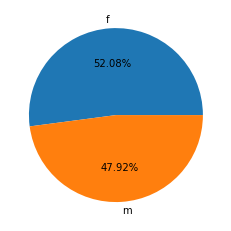

In [36]:
genre_client = df_customers.groupby('sex').size().reset_index()
genre_client.columns = ['sex','nombre']
plt.pie(x=genre_client['nombre'], labels=genre_client['sex'], autopct='%.2f%%')

# Jointures des fichiers

In [37]:
df_customers.head()

,client_id,sex,birth,age
0,c_4410,f,1967,55
1,c_7839,f,1975,47
2,c_1699,f,1984,38
3,c_5961,f,1962,60
4,c_5320,m,1943,79


In [38]:
df_transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29,s_211425,c_103
1,1_251,2022-02-02 07:55:19,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33,s_225667,c_6714
3,2_209,2021-06-24 04:19:29,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08,s_325227,c_4232


In [39]:
#Jointure des fichiers df_customers & transactions
df_customers_transactions=pd.merge(df_customers, df_transactions, on='client_id', how= 'right', indicator=True)
df_customers_transactions.head()

,client_id,sex,birth,age,id_prod,date,session_id,_merge
0,c_103,f,1986,36,0_1518,2022-05-20 13:21:29,s_211425,both
1,c_8534,m,1988,34,1_251,2022-02-02 07:55:19,s_158752,both
2,c_6714,f,1968,54,0_1277,2022-06-18 15:44:33,s_225667,both
3,c_6941,m,2000,22,2_209,2021-06-24 04:19:29,s_52962,both
4,c_4232,m,1980,42,0_1509,2023-01-11 08:22:08,s_325227,both


In [40]:
df_customers_transactions['_merge'].value_counts()

both          679332
left_only          0
right_only         0
Name: _merge, dtype: int64

In [41]:
#on enlève la colonne _merge
df_customers_transactions=df_customers_transactions.drop(['_merge'], axis=1)
df_customers_transactions

,client_id,sex,birth,age,id_prod,date,session_id
0,c_103,f,1986,36,0_1518,2022-05-20 13:21:29,s_211425
1,c_8534,m,1988,34,1_251,2022-02-02 07:55:19,s_158752
2,c_6714,f,1968,54,0_1277,2022-06-18 15:44:33,s_225667
3,c_6941,m,2000,22,2_209,2021-06-24 04:19:29,s_52962
4,c_4232,m,1980,42,0_1509,2023-01-11 08:22:08,s_325227
...,...,...,...,...,...,...,...
679327,c_8489,f,1951,71,0_1551,2022-01-15 13:05:06,s_150195
679328,c_4370,f,1977,45,1_639,2022-03-19 16:03:23,s_181434
679329,c_304,f,1988,34,0_1425,2022-12-20 04:33:37,s_314704
679330,c_2227,m,1986,36,0_1994,2021-07-16 20:36:35,s_63204


In [42]:
#Jointure df products et customers_transactions
df_merge= pd.merge(df_products,df_customers_transactions, on='id_prod', how='right', indicator= True)
display(df_merge.head())
display(df_merge.shape)

,id_prod,price,categ,client_id,sex,birth,age,date,session_id,_merge
0,0_1518,4.18,0,c_103,f,1986,36,2022-05-20 13:21:29,s_211425,both
1,1_251,15.99,1,c_8534,m,1988,34,2022-02-02 07:55:19,s_158752,both
2,0_1277,7.99,0,c_6714,f,1968,54,2022-06-18 15:44:33,s_225667,both
3,2_209,69.99,2,c_6941,m,2000,22,2021-06-24 04:19:29,s_52962,both
4,0_1509,4.99,0,c_4232,m,1980,42,2023-01-11 08:22:08,s_325227,both


(679332, 10)

In [43]:
df_merge['price'].describe()

count    679111.000000
mean         17.454773
std          18.328998
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [44]:
df_merge['_merge'].value_counts()

both          679111
right_only       221
left_only          0
Name: _merge, dtype: int64

In [45]:
#Nous vérifions les données manquantes avec right_only et c'est surtout ce qui va nous intéresser
df_merge_manquant_right= df_merge.loc[df_merge['_merge']=='right_only']
display(df_merge_manquant_right.head())
display(df_merge_manquant_right.shape)
#On a 221 transactions pour lesquelles nous n'avons pas de prix concernant le product 0_2245

,id_prod,price,categ,client_id,sex,birth,age,date,session_id,_merge
2633,0_2245,NaN,NaN,c_4746,m,1940,82,2022-09-23 07:22:38,s_272266,right_only
10103,0_2245,NaN,NaN,c_6713,f,1963,59,2022-07-23 09:24:14,s_242482,right_only
11723,0_2245,NaN,NaN,c_5108,m,1978,44,2022-12-03 03:26:35,s_306338,right_only
15670,0_2245,NaN,NaN,c_1391,m,1991,31,2021-08-16 11:33:25,s_76493,right_only
16372,0_2245,NaN,NaN,c_7954,m,1973,49,2022-07-16 05:53:01,s_239078,right_only


(221, 10)

## Analyse du produit ['0_2245']

In [46]:
#Recherche des produits manquants 
id_prod_missing=df_merge_manquant_right['id_prod'].unique()
print("Le produit",id_prod_missing,"est manquant dans le système et nécessite investigation en interne erreur ou oubli")

Le produit ['0_2245'] est manquant dans le système et nécessite investigation en interne erreur ou oubli


In [47]:
df_products.loc[df_products['id_prod']=='0_2245'] #le produit est bien manquant dans le df_products

,id_prod,price,categ


In [48]:
#Affichage de id_prod 0_2245
id_prod_missing_0_2245=df_merge_manquant_right.loc[df_merge_manquant_right['id_prod']=='0_2245']
display(id_prod_missing_0_2245.head())
print("il y a",id_prod_missing_0_2245.shape[0],"transactions correspondant au produit 0_2245 ")

,id_prod,price,categ,client_id,sex,birth,age,date,session_id,_merge
2633,0_2245,NaN,NaN,c_4746,m,1940,82,2022-09-23 07:22:38,s_272266,right_only
10103,0_2245,NaN,NaN,c_6713,f,1963,59,2022-07-23 09:24:14,s_242482,right_only
11723,0_2245,NaN,NaN,c_5108,m,1978,44,2022-12-03 03:26:35,s_306338,right_only
15670,0_2245,NaN,NaN,c_1391,m,1991,31,2021-08-16 11:33:25,s_76493,right_only
16372,0_2245,NaN,NaN,c_7954,m,1973,49,2022-07-16 05:53:01,s_239078,right_only


il y a 221 transactions correspondant au produit 0_2245 


In [49]:
df_merge.shape[0]

679332

In [50]:
#si on supprime ces données on aura un perte
poucentage_incertitude= 221/ (df_merge.shape[0])*100
print("Nous avons", round(poucentage_incertitude,3),"% de données manquantes")

Nous avons 0.033 % de données manquantes


In [51]:
#On vérifie si pour chaque début de id_prod (test_id_prod) cela correspond bien a la catégorie
#On prend le premier élément des id_products pour vérifier notre hypothèse si cela correspond bien à la catégorie
df_merge['test_id_prod'] = df_merge['id_prod'].str[0]

pd.crosstab(df_merge['categ'], df_merge['test_id_prod']).astype(bool)


test_id_prod,0,1,2
categ,,,
0,True,False,False
1,False,True,False
2,False,False,True


In [52]:
df_merge.drop('test_id_prod', inplace=True, axis=1)

In [53]:
#Choix de l'imputation par la moyenne en utilisant la moyenne du prix de la catégorie 0 car le id commence par 0
moyenne_prix_categ_0= df_merge.loc[df_merge['categ']==0]['price'].mean()
print("Le prix moyen des livres de categorie 0 est de", round(moyenne_prix_categ_0,2),"€")
df_merge['price']=df_merge['price'].fillna(moyenne_prix_categ_0)

Le prix moyen des livres de categorie 0 est de 10.64 €


In [54]:
df_merge.loc[df_merge['id_prod']=='0_2245']

,id_prod,price,categ,client_id,sex,birth,age,date,session_id,_merge
2633,0_2245,10.638188,NaN,c_4746,m,1940,82,2022-09-23 07:22:38,s_272266,right_only
10103,0_2245,10.638188,NaN,c_6713,f,1963,59,2022-07-23 09:24:14,s_242482,right_only
11723,0_2245,10.638188,NaN,c_5108,m,1978,44,2022-12-03 03:26:35,s_306338,right_only
15670,0_2245,10.638188,NaN,c_1391,m,1991,31,2021-08-16 11:33:25,s_76493,right_only
16372,0_2245,10.638188,NaN,c_7954,m,1973,49,2022-07-16 05:53:01,s_239078,right_only
...,...,...,...,...,...,...,...,...,...,...
669533,0_2245,10.638188,NaN,c_131,m,1981,41,2021-08-25 09:06:03,s_80395,right_only
670484,0_2245,10.638188,NaN,c_4167,f,1979,43,2022-03-06 19:59:19,s_175311,right_only
671088,0_2245,10.638188,NaN,c_4453,m,1981,41,2022-05-16 11:35:20,s_209381,right_only
675480,0_2245,10.638188,NaN,c_1098,m,1986,36,2022-02-11 09:05:43,s_163405,right_only


In [55]:
#On remplace donc la valeur manquante dans categorie par 0 
df_merge['categ']=df_merge['categ'].fillna(0)


In [56]:
df_merge['categ'].unique()

array([0, 1, 2], dtype=int64)

In [57]:
#Suppression de la colonne _merge et affichage du df_merge_final
df_merge_final=df_merge.drop(['_merge'], axis=1)
display(df_merge_final.head())
display(df_merge_final.shape)

,id_prod,price,categ,client_id,sex,birth,age,date,session_id
0,0_1518,4.18,0,c_103,f,1986,36,2022-05-20 13:21:29,s_211425
1,1_251,15.99,1,c_8534,m,1988,34,2022-02-02 07:55:19,s_158752
2,0_1277,7.99,0,c_6714,f,1968,54,2022-06-18 15:44:33,s_225667
3,2_209,69.99,2,c_6941,m,2000,22,2021-06-24 04:19:29,s_52962
4,0_1509,4.99,0,c_4232,m,1980,42,2023-01-11 08:22:08,s_325227


(679332, 9)

In [58]:
df_merge_final['price'].describe()

count    679332.000000
mean         17.452556
std          18.326428
min           0.620000
25%           8.870000
50%          13.990000
75%          18.990000
max         300.000000
Name: price, dtype: float64

In [59]:
df_merge_final

,id_prod,price,categ,client_id,sex,birth,age,date,session_id
0,0_1518,4.18,0,c_103,f,1986,36,2022-05-20 13:21:29,s_211425
1,1_251,15.99,1,c_8534,m,1988,34,2022-02-02 07:55:19,s_158752
2,0_1277,7.99,0,c_6714,f,1968,54,2022-06-18 15:44:33,s_225667
3,2_209,69.99,2,c_6941,m,2000,22,2021-06-24 04:19:29,s_52962
4,0_1509,4.99,0,c_4232,m,1980,42,2023-01-11 08:22:08,s_325227
...,...,...,...,...,...,...,...,...,...
679327,0_1551,12.99,0,c_8489,f,1951,71,2022-01-15 13:05:06,s_150195
679328,1_639,10.99,1,c_4370,f,1977,45,2022-03-19 16:03:23,s_181434
679329,0_1425,12.99,0,c_304,f,1988,34,2022-12-20 04:33:37,s_314704
679330,0_1994,4.98,0,c_2227,m,1986,36,2021-07-16 20:36:35,s_63204


In [60]:
#Le CA total serait de
ca = df_merge_final['price'].sum()
print('CA =', round(ca,2), "€")

CA = 11856079.72 €


In [61]:
#Changement du type de date en date et changement du format de date en enlevant les heures. 
df_merge_final['date']=df_merge_final['date'].astype('datetime64[s]')
df_merge_final['date_mois'] = df_merge_final['date'].dt.to_period('M')
df_merge_final['date_annee'] = df_merge_final['date'].dt.to_period('Y')

df_merge_final['date']=df_merge_final['date'].dt.strftime('%Y-%m-%d')


df_merge_final.head()

,id_prod,price,categ,client_id,sex,birth,age,date,session_id,date_mois,date_annee
0,0_1518,4.18,0,c_103,f,1986,36,2022-05-20,s_211425,2022-05,2022
1,1_251,15.99,1,c_8534,m,1988,34,2022-02-02,s_158752,2022-02,2022
2,0_1277,7.99,0,c_6714,f,1968,54,2022-06-18,s_225667,2022-06,2022
3,2_209,69.99,2,c_6941,m,2000,22,2021-06-24,s_52962,2021-06,2021
4,0_1509,4.99,0,c_4232,m,1980,42,2023-01-11,s_325227,2023-01,2023


## Evolution du CA dans le temps

<AxesSubplot:xlabel='date'>

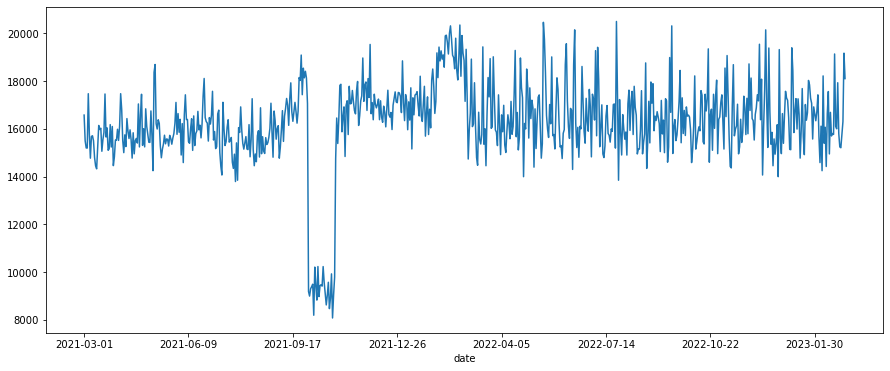

In [62]:
#Représentation graphique de l'évolution du CA par jour
fig = plt.figure(figsize =(15,6))
df_merge_final.groupby(['date'])['price'].sum().plot()

<AxesSubplot:xlabel='date_mois'>

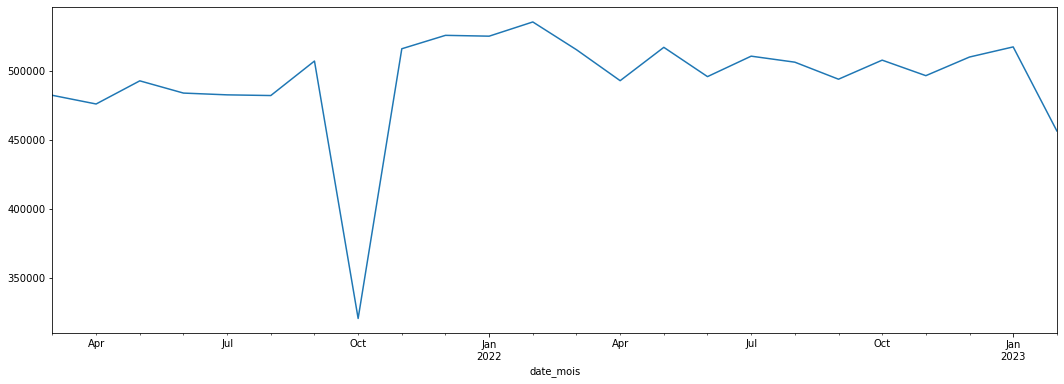

In [63]:
#Représentation graphique de l'évolution du CA par mois

fig = plt.figure(figsize =(18,6))
df_merge_final.groupby(['date_mois'])['price'].sum().plot()

D'après le graphique l'évolution du CA par jour et par mois, on remarque une anomalie au niveau du mois d'octobre et décidons de traiter le mois d'octobre 2021 séparément pour trouver une explication.

# Etude du mois d'octobre 2021

In [64]:
#Création d'un df octobre 2021
df_octobre_2021 = df_merge_final.loc[(df_merge_final['date_mois']=='2021-10')]
df_octobre_2021

,id_prod,price,categ,client_id,sex,birth,age,date,session_id,date_mois,date_annee
68,0_1409,4.99,0,c_5725,m,1975,47,2021-10-02,s_99013,2021-10,2021
71,0_1247,15.99,0,c_3394,f,1978,44,2021-10-03,s_99443,2021-10,2021
80,0_1272,17.01,0,c_8534,m,1988,34,2021-10-13,s_104207,2021-10,2021
86,0_1102,4.63,0,c_1609,m,1980,42,2021-10-24,s_109442,2021-10,2021
93,0_1079,5.99,0,c_7918,m,1987,35,2021-10-05,s_100557,2021-10,2021
...,...,...,...,...,...,...,...,...,...,...,...
679222,0_1418,8.57,0,c_7213,m,1979,43,2021-10-22,s_108264,2021-10,2021
679240,0_1391,7.99,0,c_7878,m,1989,33,2021-10-26,s_110243,2021-10,2021
679290,0_1609,18.99,0,c_6714,f,1968,54,2021-10-15,s_105230,2021-10,2021
679315,0_1635,16.99,0,c_1061,m,1991,31,2021-10-01,s_98649,2021-10,2021


In [65]:
#CA du mois octobre 2021
ca_octobre= df_octobre_2021['price'].sum()
print("CA du mois octobre", round(ca_octobre,2), "€")

CA du mois octobre 320873.21 €


In [66]:
#Visualisation du CA octobre par categorie
ca_octobre_categ = df_octobre_2021.groupby(['date','categ'])['price'].sum().reset_index()
ca_octobre_categ.head(9)

,date,categ,price
0,2021-10-01,0,6950.500000
1,2021-10-01,1,7003.790000
2,2021-10-01,2,3104.050000
3,2021-10-02,0,7141.010000
4,2021-10-02,2,2041.120000
5,2021-10-03,0,6786.570000
6,2021-10-03,2,2206.480000
7,2021-10-04,0,6554.876376
8,2021-10-04,2,2746.080000


<AxesSubplot:xlabel='date_mois'>

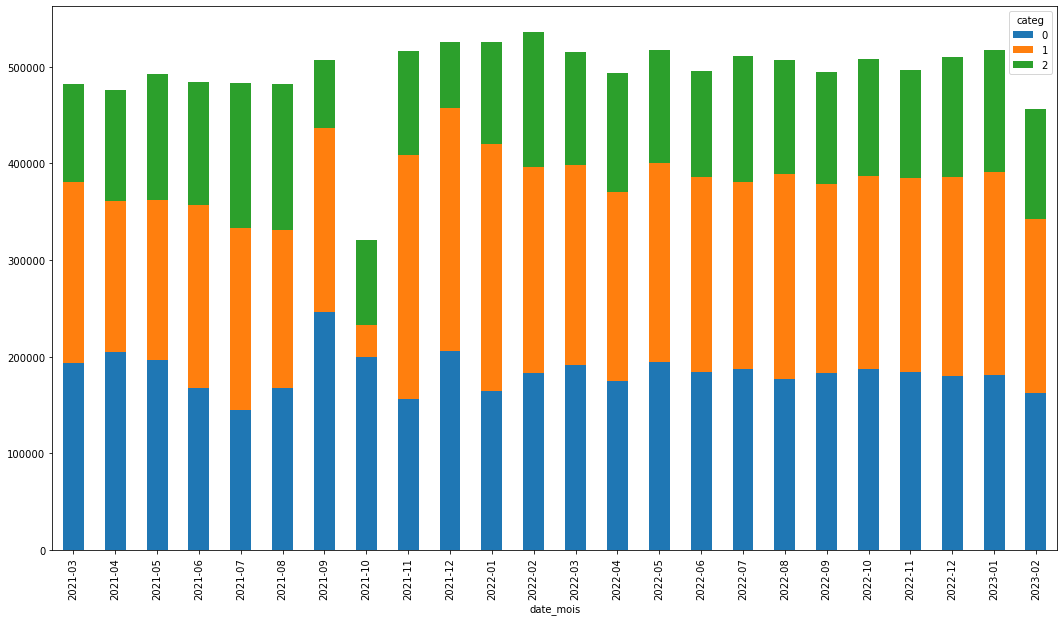

In [67]:
# CA par catégorie et par mois
df_merge_final.groupby(['date_mois','categ']).sum().unstack().plot(kind='bar', y = 'price', stacked=True, figsize = (18,10))

Il semble y avoir une anomalie au niveau du mois d'octobre 2021. La part du CA de la catégorie 1 est insignifiante par rapport aux autres mois.

<AxesSubplot:xlabel='date'>

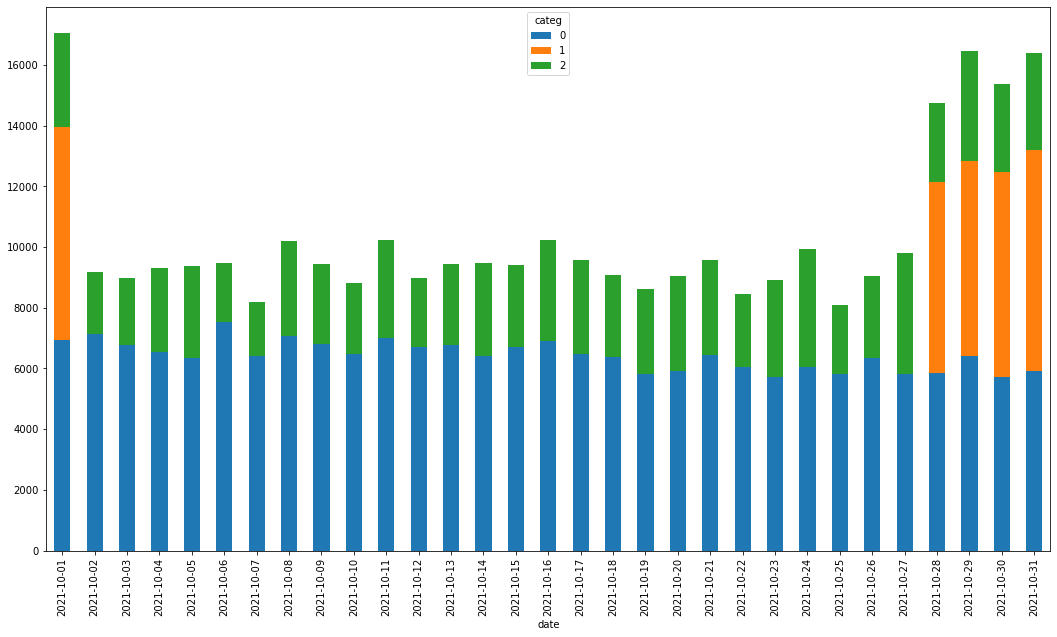

In [68]:
#CA octobre par catégorie et par jour
ca_octobre_categ.groupby(['date','categ']).sum().unstack().plot(kind='bar', y = 'price', stacked=True, figsize = (18,10))

Il semble manquer des données dans la catégorie 1 du 02-10-2021 au 27-10-2021

In [69]:
#On décide d'enlever le mois d'octobre 2021

df_final=df_merge_final.drop(df_merge_final[df_merge_final["date_mois"]=='2021-10'].index)
display(df_final)

,id_prod,price,categ,client_id,sex,birth,age,date,session_id,date_mois,date_annee
0,0_1518,4.18,0,c_103,f,1986,36,2022-05-20,s_211425,2022-05,2022
1,1_251,15.99,1,c_8534,m,1988,34,2022-02-02,s_158752,2022-02,2022
2,0_1277,7.99,0,c_6714,f,1968,54,2022-06-18,s_225667,2022-06,2022
3,2_209,69.99,2,c_6941,m,2000,22,2021-06-24,s_52962,2021-06,2021
4,0_1509,4.99,0,c_4232,m,1980,42,2023-01-11,s_325227,2023-01,2023
...,...,...,...,...,...,...,...,...,...,...,...
679327,0_1551,12.99,0,c_8489,f,1951,71,2022-01-15,s_150195,2022-01,2022
679328,1_639,10.99,1,c_4370,f,1977,45,2022-03-19,s_181434,2022-03,2022
679329,0_1425,12.99,0,c_304,f,1988,34,2022-12-20,s_314704,2022-12,2022
679330,0_1994,4.98,0,c_2227,m,1986,36,2021-07-16,s_63204,2021-07,2021


In [70]:
#Enregistrement de notre df_final sous forme de fichier CSV

df_final = df_final.to_csv('df_final.csv')